In [1]:
from IPython.display import clear_output
import random

In [2]:
%run sim_network.ipynb
%run berkeley.ipynb
%run util.ipynb

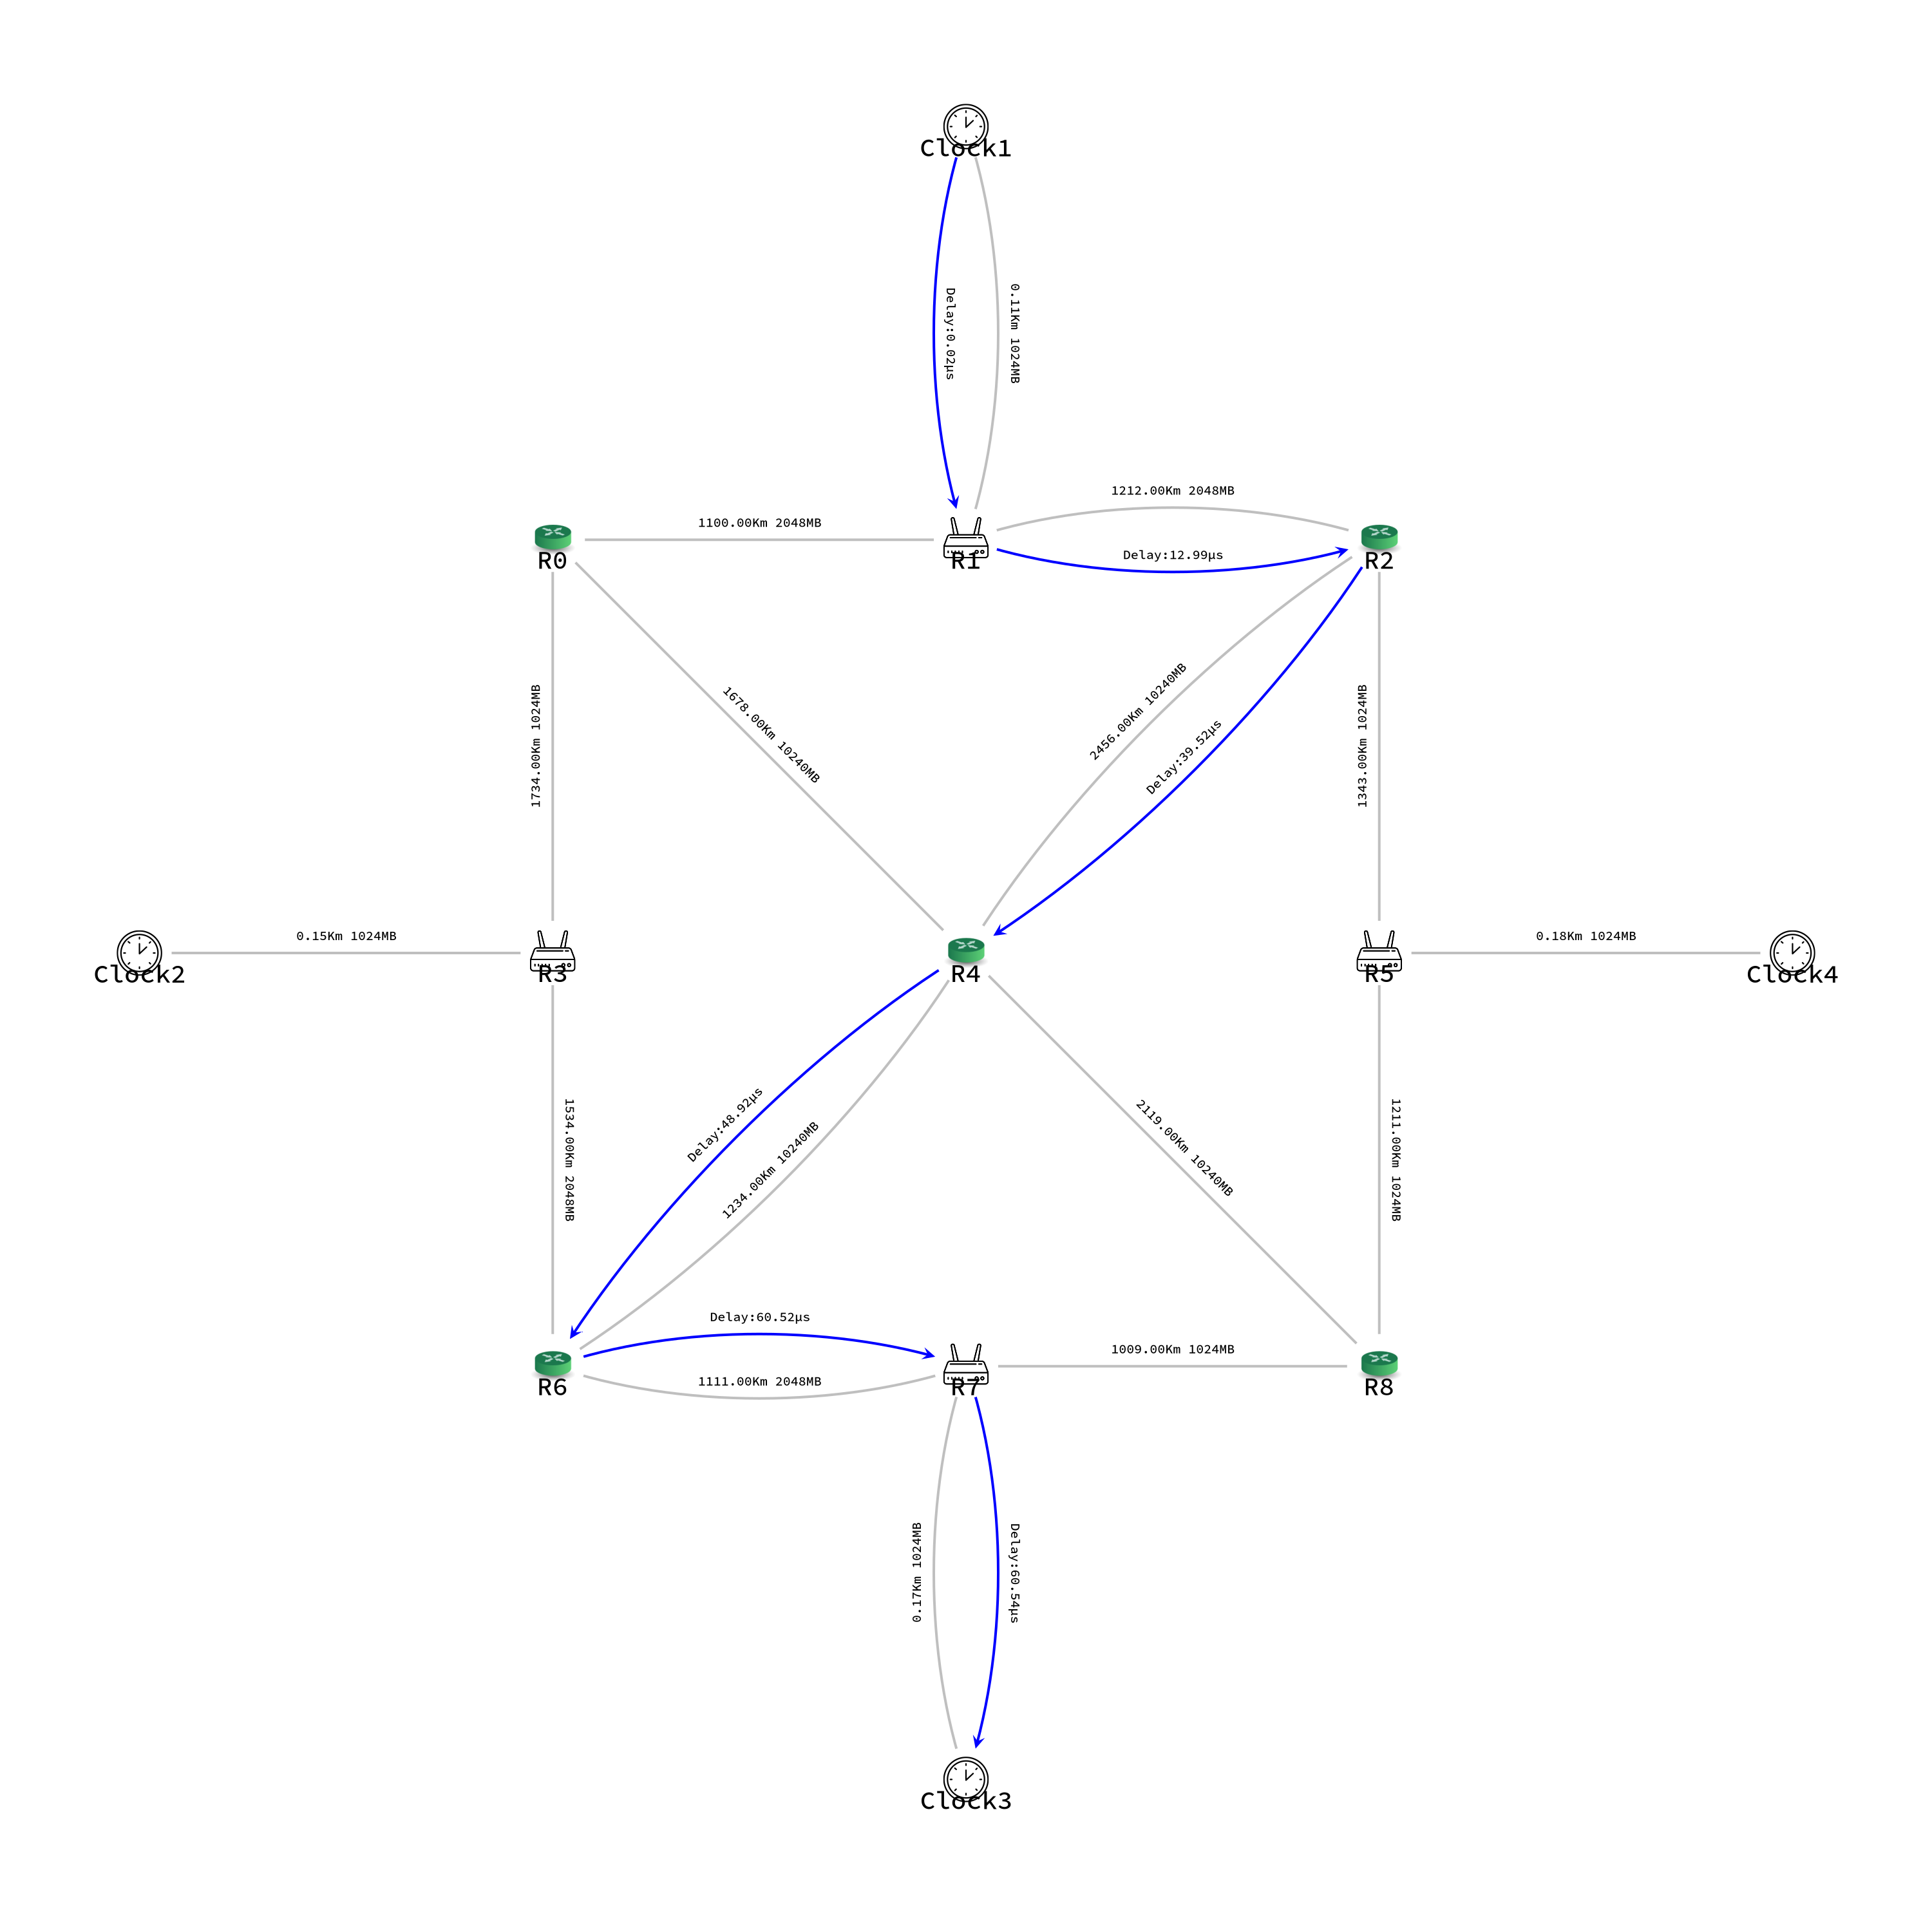

In [3]:
print_g_route()

In [4]:
def show_error_with_time(data_dict):
    pass

In [5]:
stride = 100

true_time = 0.0
error_nodes_data = {}
clocks = get_clocks(nodes)
main_clock = get_main_clock(clocks)
print(f"main clock = {main_clock.show_name}")
slave_clocks = get_slave_clocks(clocks,main_clock)
error_nodes_data['true time'] = []
for clock in clocks:
    error_nodes_data[clock] = []

def set_error_nodes_data(error_nodes_data):
    error_nodes_data['true time'].append(step*stride*1.0)
    for clock in clocks:
        error_nodes_data[clock].append(clock.time)

main clock = Clock1


In [ ]:
remove_file("output/clocks_delay/","*.csv")
remove_file("output/link_info/","*.csv")
remove_file("output/visualization/","*.*")
step = 1
while True:
    
    print(f'         {format_time_units()}')
    print(f'True Time {format_time(true_time)}')
    set_error_nodes_data(error_nodes_data)
    for clock in clocks:
        print(f'{clock.show_name}    {format_time(clock.time)}')
        clock.time += stride+clockDeltaTime(step*stride)
    true_time += stride
    reset_all_links_delay(links,package_size)
    for slave_clock in slave_clocks:
        clear_all_route(g,routes,links)
        create_best_route(main_clock.name,slave_clock.name)
        set_default_properties(links,nodes)
        print_g_route(f"output/visualization/{step}_{main_clock.show_name} To {slave_clock.show_name}.png")
    save_all_links_delay(links,step)
    if step % 10 == 0:
        new_time = run_berkeley_algorithm(main_node=clock.show_name,step=step)
        print(f"Target Time :{new_time}")
        for clock in clocks:
            print(f"Correction of {clock.show_name}: {float(new_time)-clock.time}")
            clock.time = float(new_time)
        time.sleep(3)
    time.sleep(1)
    step+=1
    clear_output(wait=True)

ClockX    hh:mm:ss |ms |µs |ns |ps
True Time 01:03:20 000 000 000 000
Clock1    01:03:20 147 603 859 247
Clock2    01:03:20 147 603 859 189
Clock3    01:03:20 147 603 859 195
Clock4    01:03:20 147 603 859 230
